In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("superstore_dataset.csv", encoding="latin1")

In [11]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Data Cleaning


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df.isnull().sum()

# Feature Engineering

In [22]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100


# Sales & Profit Trends

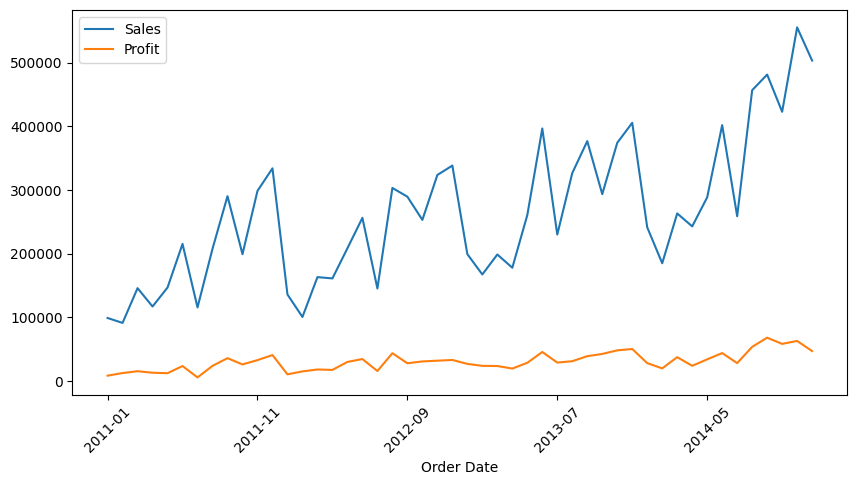

In [25]:
monthly = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

monthly['Order Date'] = monthly['Order Date'].astype(str)

monthly.plot(x='Order Date', y=['Sales','Profit'], figsize=(10,5))
plt.xticks(rotation=45)
plt.show()


# Category-wise Performance

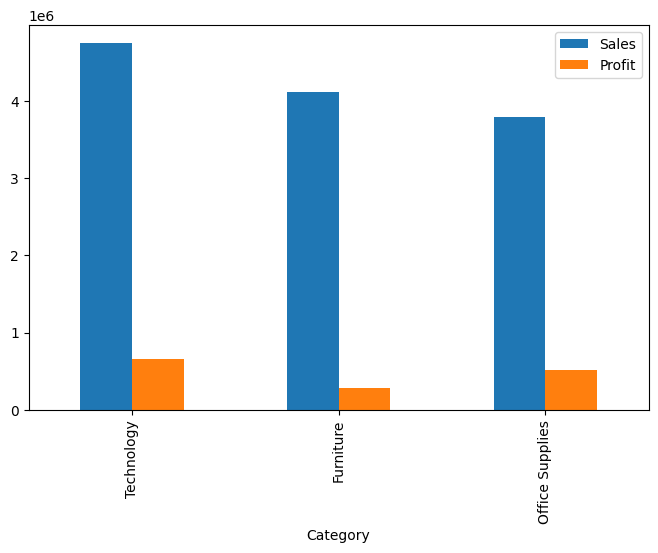

In [28]:
cat = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
cat.plot(kind='bar', figsize=(8,5))
plt.show()


# Discount vs Profit

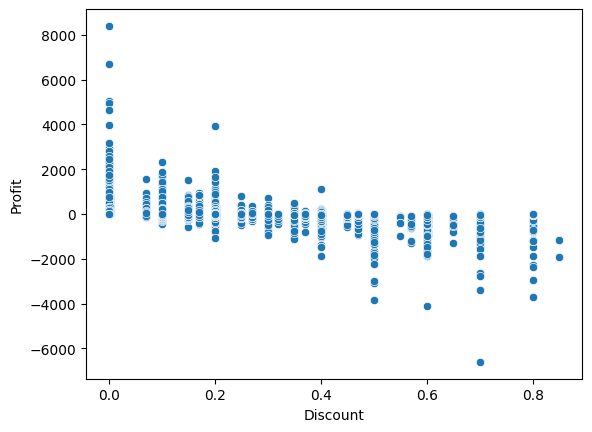

In [31]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.show()


# Region-wise Analysis


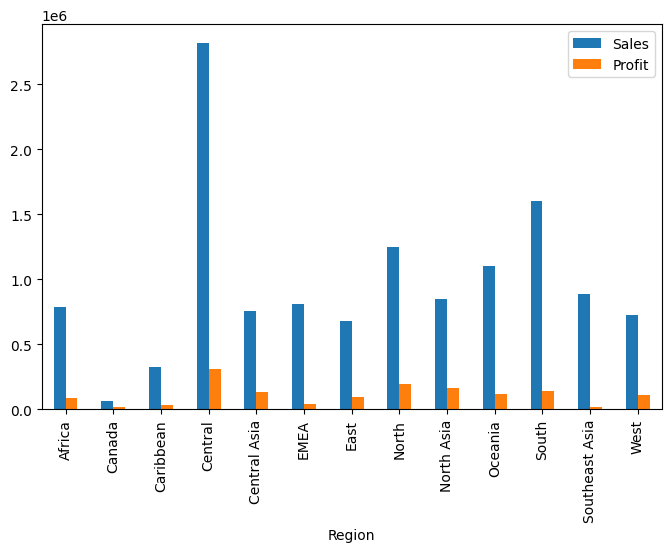

In [34]:
region = df.groupby('Region')[['Sales','Profit']].sum()
region.plot(kind='bar', figsize=(8,5))
plt.show()
